In [1]:
import warnings
warnings.simplefilter("ignore")
from nltk.corpus import stopwords

In [4]:
import sys
sys.path.append('.')
import utils



# Les instructions suivantes sont TRES utile pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Chargement des données

In [5]:
comments, notes = utils.load_data()

In [6]:
print(notes[0],comments[0])

8.0 et voila un triplette de bubblees rouges et pop je t inverse deux bubblees chez toi avec un noir biensur    pas assez tordu pour vous    alors que pensez vous des bubblees violets qui renvoient un des votres chez la planète adverse  ah ah   là je vous tiens  c est plus tactique qu il n y parait et bien retord   avec un peu de chance c est vrai  mais n est il pas encore plus agréable et jouissif de gagner même lorsque le sort s acharne contre vous  je n ai pas encore l extension mais elle sera bientôt mienne 


In [7]:
cls = utils.binarisation(notes, nb=False)

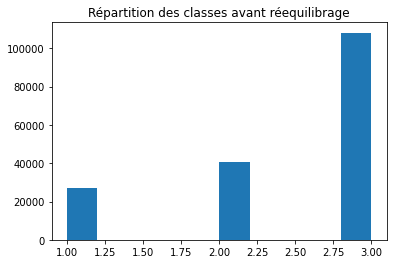

In [8]:
import matplotlib.pyplot as plt
plt.hist(cls)
plt.title('Répartition des classes avant réequilibrage')
plt.show()

In [9]:
### Juste pour la visualisation à ne pas utiliser dans la suite 

from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
com = count_vect.fit_transform(comments)
rus = RandomUnderSampler(random_state=42)
comments_resample, cls_resample = rus.fit_resample(com, cls)

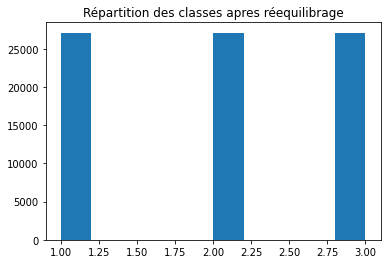

In [10]:
plt.hist(cls_resample)
plt.title('Répartition des classes apres réequilibrage')
plt.show()

### Les mots les plus fréquenrs

In [11]:
# tri les mots par ordre décroissant de leurs fréquences, à lancer une seule fois c'est bon
mots_freq = utils.words_frequencies(comments)

In [12]:
k = 50
mots_k =[m for m,f in mots_freq[:k]]
print(f'Les {k} mots les plus fréquents: {mots_k}')

Les 50 mots les plus fréquents: ['de', 'et', 'le', 'est', 'un', 'les', 'jeu', 'la', 'des', 'en', 'pas', 'pour', 'on', 'que', 'une', 'qui', 'il', 'mais', 'ce', 'du', 'plus', 'je', 'dans', 'ne', 'avec', 'très', 'bien', 'au', 'qu', 'tout', 'se', 'sur', 'sont', 'ou', 'vous', 'cartes', 'peu', 'par', 'même', 'si', 'joueurs', 'bon', 'partie', 'fait', 'peut', 'ai', 'faire', 'jouer', 'parties', 'ça']


## Variantes et évaluations

In [13]:
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False)
utils.top_words(model, vectorizer) 

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best model: Logistic Regression
Logistic regression accuracy: 0.5560698565952009  f1-score: 0.5822237911132101
Top 10 mots positifs:  ['déception', 'décevant', 'ratage', 'ennuyeux', 'désavantage', 'ennui', 'ascendant', 'affreux', 'perception', 'médiocre']
Top 10 mots négatifs:  ['revivre', 'vindjeu', 'bémol', 'claustrophobia', 'pépite', 'réactions', 'restantes', 'régal', 'maximale', 'rythmées']


In [14]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, nbins=False)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.5877608973448815  f1-score: 0.6122275461602433
Top 10 mots positifs:  ['déception', 'intérêt', 'ennui', 'ennuyeux', 'décevant', 'aucun', 'ennuie', 'pas', 'oie', 'aucune']
Top 10 mots négatifs:  ['excellent', 'bémol', 'bon', 'agréable', 'bien', 'efficace', 'must', 'indispensable', 'parfait', 'attention']


### Stopwords

In [15]:
model, vectorizer = utils.count_vectorizer(comments, notes, stop_words=stopwords.words('french'), nbins=False)
utils.top_words(model, vectorizer) 

Best model: Naïve Bayes
Naïve bayes accuracy: 0.5531165696436178  f1-score: 0.5783588781035033
Poids des mots positifs et négatifs non connus, entre guillemets !


In [16]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, stop_words=stopwords.words('french'), nbins=False)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.5823654692602585  f1-score: 0.6070099848781721
Top 10 mots positifs:  ['déception', 'intérêt', 'ennui', 'ennuyeux', 'ennuie', 'décevant', 'ennuyé', 'aucun', 'déçu', 'chose']
Top 10 mots négatifs:  ['excellent', 'bémol', 'bon', 'agréable', 'efficace', 'must', 'bien', 'parfait', 'permet', 'bonheur']


### Stopswords et les 200 termes les plus fréquents

In [17]:
k = 200
mots_k =[m for m,f in mots_freq[:k]]
stop_words = mots_k + stopwords.words('french')
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.5294334800511146  f1-score: 0.5562899752843692
Top 10 mots positifs:  ['déception', 'décevant', 'ratage', 'ennuyé', 'error', 'ennuyeux', 'ennui', 'désavantage', 'ratée', 'convenu']
Top 10 mots négatifs:  ['bémol', 'pépite', 'revivre', 'régal', 'bouder', 'assurée', 'maximale', 'disposer', 'vindjeu', 'bémols']


In [18]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes,nbins=False,stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.5610393298310379  f1-score: 0.5865637089736605
Top 10 mots positifs:  ['déception', 'intérêt', 'ennui', 'ennuyeux', 'décevant', 'ennuie', 'ennuyé', 'pire', 'aucun', 'aucune']
Top 10 mots négatifs:  ['bémol', 'efficace', 'must', 'fluide', 'tendu', 'parfait', 'bonheur', 'attention', 'indispensable', 'plaisant']


### Stopswords et les 2 000 termes les plus fréquents

In [19]:
k = 2_000
mots_k =[m for m,f in mots_freq[:k]]
stop_words = mots_k + stopwords.words('french')
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Naïve Bayes
Naïve bayes accuracy: 0.4456339627999432  f1-score: 0.47334867066460723
Poids des mots positifs et négatifs non connus, entre guillemets !


In [20]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, nbins=False, stop_words=stop_words, preprocessor=utils.stem)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.5363623455913673  f1-score: 0.5619268894492955
Top 10 mots positifs:  ['décept', 'décev', 'pir', 'désol', 'répétit', 'médiocr', 'mauv', 'chi', 'impossibl', 'poussi']
Top 10 mots négatifs:  ['agréabl', 'efficac', 'reproch', 'fluid', 'vindjeu', 'parf', 'jouiss', 'hésit', 'rigolad', 'garant']


### Stopswords et les 20 000 termes les plus fréquents

In [21]:
k = 20_000
mots_k =[m for m,f in mots_freq[:k]]
stop_words = mots_k + stopwords.words('french')
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Random Forest
Random forest accuracy: 0.6148232287377537  f1-score: 0.4713929550977774
Poids des mots positifs et négatifs non connus, entre guillemets !


In [22]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, nbins=False, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Random Forest
Random forest accuracy: 0.6150788016470254  f1-score: 0.4715302100463098
Poids des mots positifs et négatifs non connus, entre guillemets !


In [23]:
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False, stop_words=stop_words,preprocessor=utils.stem)
utils.top_words(model, vectorizer) 

Best model: Naïve Bayes
Naïve bayes accuracy: 0.4903592219224762  f1-score: 0.5188069858199154
Poids des mots positifs et négatifs non connus, entre guillemets !


### Bigrammes

In [24]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes , nbins=False,  ngram_range=(1, 2))
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.6079227601874201  f1-score: 0.6314528543138581
Top 10 mots positifs:  ['intérêt', 'déception', 'pas', 'rien', 'trop', 'aucun', 'ennui', 'ennuyeux', 'aucune', 'répétitif']
Top 10 mots négatifs:  ['excellent', 'bon jeu', 'un peu', 'bien', 'agréable', 'pas mal', 'très bon', 'pas trop', 'bon', 'bémol']


In [25]:
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False, ngram_range=(1, 2), max_df=0.5, stop_words=stopwords.words('french'))
utils.top_words(model, vectorizer)

Best model: Naïve Bayes
Naïve bayes accuracy: 0.6088314638648303  f1-score: 0.6275734445235349
Poids des mots positifs et négatifs non connus, entre guillemets !


In [26]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, nbins=False, ngram_range=(1, 2), max_df=0.5, stop_words=stopwords.words('french'))
utils.top_words(model, vectorizer)

Best model: Naïve Bayes
Naïve bayes accuracy: 0.6108192531591651  f1-score: 0.629609487507173
Poids des mots positifs et négatifs non connus, entre guillemets !


In [27]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, nbins=False, stop_words=stop_words)
utils.top_words(model, vectorizer) 

Best model: Random Forest
Random forest accuracy: 0.6150788016470254  f1-score: 0.4715302100463098
Poids des mots positifs et négatifs non connus, entre guillemets !


### Trigrammes

In [28]:
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False, ngram_range=(1, 3))
utils.top_words(model, vectorizer) 

Best model: Naïve Bayes
Naïve bayes accuracy: 0.6216385063183303  f1-score: 0.6384526461737937
Poids des mots positifs et négatifs non connus, entre guillemets !


In [29]:
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False, ngram_range=(1, 3))
utils.top_words(model, vectorizer) 

Best model: Naïve Bayes
Naïve bayes accuracy: 0.6216385063183303  f1-score: 0.6384526461737937
Poids des mots positifs et négatifs non connus, entre guillemets !


In [30]:
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False, ngram_range=(1, 3), max_df=0.5, stop_words=stopwords.words('french'))
utils.top_words(model, vectorizer)

Best model: Naïve Bayes
Naïve bayes accuracy: 0.6129206304131762  f1-score: 0.6308749093881143
Poids des mots positifs et négatifs non connus, entre guillemets !


In [31]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, nbins=False, ngram_range=(1, 2), max_df=0.5, stop_words=stopwords.words('french'))
utils.top_words(model, vectorizer)

Best model: Naïve Bayes
Naïve bayes accuracy: 0.6108192531591651  f1-score: 0.629609487507173
Poids des mots positifs et négatifs non connus, entre guillemets !


### Stem

In [32]:
stop_words = stopwords.words('french')
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False, stop_words=stop_words,preprocessor=utils.stem)
utils.top_words(model, vectorizer) 

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best model: Logistic Regression
Logistic regression accuracy: 0.5505608405509016  f1-score: 0.5766858433136628
Top 10 mots positifs:  ['rendon', 'ratag', 'décept', 'atz', 'decept', 'alimentair', 'modelag', 'médiocr', 'différentiel', 'devenus']
Top 10 mots négatifs:  ['revivr', 'dujardin', 'craign', 'hesit', 'vindjeu', 'surnombr', 'bémol', 'secou', 'ariv', 'maximal']


In [33]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, nbins=False, stop_words=stop_words,preprocessor=utils.stem)
utils.top_words(model, vectorizer) 

Best model: Logistic Regression
Logistic regression accuracy: 0.5777651568933693  f1-score: 0.6024762029108918
Top 10 mots positifs:  ['décept', 'ennui', 'intérêt', 'aucun', 'décev', 'déçu', 'répétit', 'pir', 'oie', 'convaincu']
Top 10 mots négatifs:  ['excellent', 'bémol', 'agréabl', 'bon', 'reproch', 'must', 'tendu', 'parf', 'efficac', 'fluid']


### Lemmatize

In [34]:
stop_words = stopwords.words('french')
model, vectorizer = utils.count_vectorizer(comments, notes, nbins=False, stop_words=stop_words,preprocessor=utils.lemmatize)
utils.top_words(model, vectorizer) 

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/Users/souleymbaye/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/share/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
model, vectorizer = utils.tfidf_vectorizer(comments, notes, nbins=False, stop_words=stop_words,preprocessor=utils.lemmatize)
utils.top_words(model, vectorizer) 